## Project introduction 

The project aims to use data science tools including Pandas and Polars, to perform descriptive statistics on the job applicant data, to gain insights into the demographics of job applicants. 


In [23]:
from mylib.lib import (
    load_dataset,
    total_applicants,
    total_female_applicant,
    total_male_applicant,
    total_unknown_applicant,
    gender_total,
    gender_chart,
    ethnicity_total,
    ethnicity_chart,
)

In [24]:
csv = "Job_Applicants.csv"
df = load_dataset(csv)
assert df is not None
assert df.shape == (187, 14)
print(df.head)

<bound method NDFrame.head of     Fiscal Year                 Job Number  \
0     2013-2014         9206 OP 2014/04/18   
1     2013-2014          1223 P 2013/08/09   
2     2013-2014         7260 OP 2014/02/14   
3     2013-2014          3227 P 2013/11/15   
4     2013-2014          2400 O 2014/05/02   
..          ...                        ...   
182   2014-2015   7840 P 2014/7/25-ARCHIVE   
183   2014-2015  4123 O 2014/07/04-ARCHIVE   
184   2014-2015   7857 O 2014/7/18-ARCHIVE   
185   2014-2015  3912/P/2014/07/25-ARCHIVE   
186   2014-2015  1774 OP 2014/7/18-ARCHIVE   

                                       Job Description  Apps Received  Female  \
0                                    311 DIRECTOR 9206             54      20   
1                                ACCOUNTING CLERK 1223            648     488   
2                                 AIRPORT MANAGER 7260             51      13   
3                       AIRPORT POLICE LIEUTENANT 2013             48       9   
4           

In [25]:
def stats_overview(df):
    summary_stats = df[["Apps Received", "Female", "Male", "Unknown_Gender"]].describe()
    summary_stats.loc["total"] = df[
        ["Apps Received", "Female", "Male", "Unknown_Gender"]
    ].sum()
    summary_stats = summary_stats.round(2)
    return summary_stats


stats_overview(df)

,Apps Received,Female,Male,Unknown_Gender
count,187.00,187.00,187.00,187.00
mean,499.72,199.03,291.71,8.98
std,2252.04,1466.00,991.02,36.56
min,5.00,0.00,2.00,0.00
25%,36.50,2.00,26.00,0.00
50%,100.00,13.00,70.00,2.00
75%,260.00,59.50,166.00,6.00
max,28230.00,19892.00,9356.00,370.00
total,93448.00,37219.00,54549.00,1680.00


In [26]:
def number_of_applicants(df):
    total_apps = total_applicants(df)
    total_female = total_female_applicant(df)
    total_male = total_male_applicant(df)
    total_unknown = total_unknown_applicant(df)
    return total_apps, total_female, total_male, total_unknown


print(number_of_applicants(df))

Total applicants: 93,448
Total female applicants: 37,219
Total male applicants: 54,549
Total unknown gender applicants: 1,680
(np.int64(93448), np.int64(37219), np.int64(54549), np.int64(1680))


## Gender Analysis 

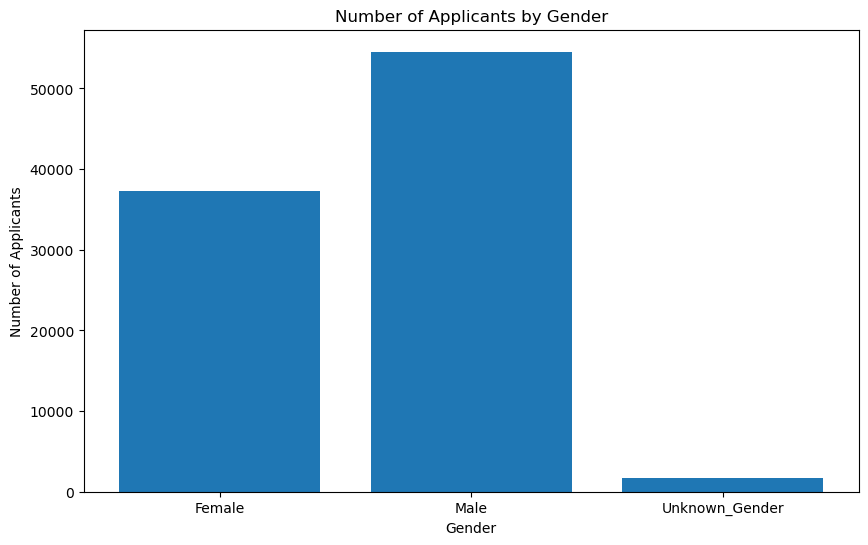

In [27]:
def gender_visulization(df):
    total_gender = gender_total(df)
    gender_chart(total_gender)


gender_visulization(df)

- Male applicants significantly outnumber female applicants;
- There is a small number of applicants with unknown gender.

## Ethnicity Analysis

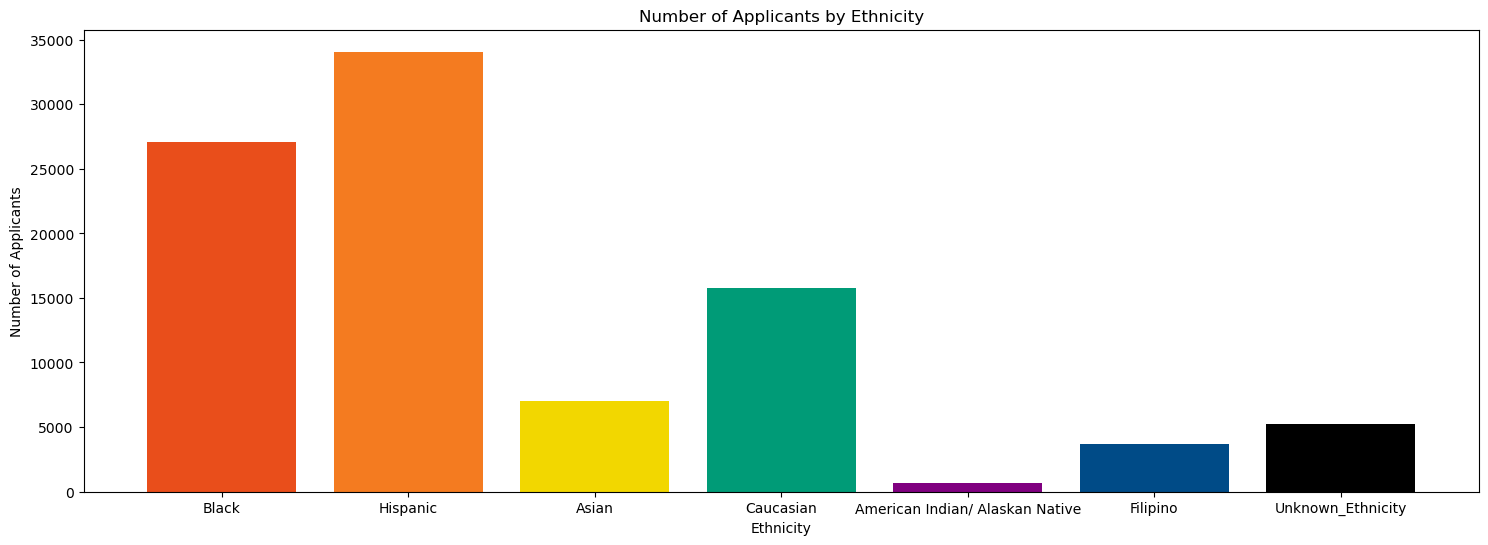

In [28]:
def ethi_visulization(df):
    total_ethi = ethnicity_total(df)
    ethnicity_chart(total_ethi)


ethi_visulization(df)

- Hispanic applicants form the largest group with 34,065 applicants
- Black applicants are the second largest group with 27,027 applicants
- Caucasian ethnicity is the third largest group with around 15,796 applicants
- Asian, Filipino, American Indian/Alaskan Native, and Unknown Ethnicity categories have significantly fewer applicants